In [1]:
using Distributions
using Random
using Plots
using LinearAlgebra
Random.seed!(42)

TaskLocalRNG()

## 1. Bernoulli Distribution

For the given algorithm:
$$
\begin{aligned}
    P(\text{getting 1}) &= \frac{P(\text{result is 1})}{P(\text{result is obtained})} \\
                        &= \frac{p_y*\frac{c_y}{c_x + c_y}}{p_y*\frac{c_y}{c_x + c_y} + p_x*\frac{c_x}{c_x + c_y}} \\
                        &= \frac{p_y*c_y}{p_x*c_x + p_y*c_y}
\end{aligned}
$$

$\therefore$ The distribution becomes Bernoulli with $p_{success} = \frac{p_yc_y}{p_xc_x + p_yc_y}$

 ## 2. Sampling from a p-dimensional sphere

In [2]:
function sampleSphere(p)
    accept = false
    counter = 0
    while .!accept
        counter = counter + 1
        u = rand(Uniform(-1, 1), p)
        if norm(u) < 1
            accept = true
            return Array([u, counter])
        end
    end
end

sampleSphere (generic function with 1 method)

As p is increased the number of iterations needed to sample the vectors increases which is natual as c is dependent on p

In [3]:
function meanIterations(p)
    N = 10000
    samp = []
    counters = []
    for i in 0:N
        res = sampleSphere(p)
        push!(samp, res[1])
        push!(counters, res[2])
    end
    return mean(counters)
end

for p in 2:6
    println(p, ": ", meanIterations(p))
end 

2: 1.2712728727127287
3: 1.901109889011099
4: 3.2246775322467753
5: 6.114788521147886
6: 12.393260673932607


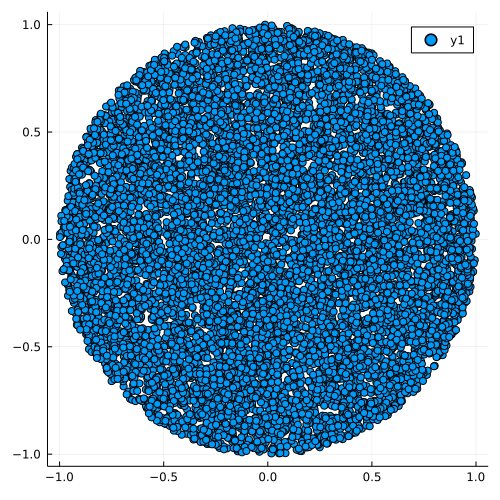

In [4]:
function plotCircle()
    N = 10000
    samp = []
    counters = []
    p = 2
    for i in 0:N
        res = sampleSphere(p)
        push!(samp, res[1])
        push!(counters, res[2])
    end

    # Plotting for p = 2

    x = []
    y = []
    for i in 1:N+1
        push!(x, samp[i][1])
        push!(y, samp[i][2])
    end

    scatter(x, y, size=(500, 500))
end

plotCircle()

---

## 3. Truncated standard normal distribution

In [5]:
function sampleTruncatedStandardNormal(a)
    accept = false
    counter = 0
    while .!accept
        n = rand(Normal())
        counter = counter + 1
        if (n > -a && n < a)
            accept = true
            return Array([n, counter])
        end
    end
end

sampleTruncatedStandardNormal (generic function with 1 method)

The value of $c$ would be $c = \frac{1}{\Phi(a) - \Phi(-a)}$

In [6]:
function calculateC(a)
    return 1/(cdf(Normal(), a) - cdf(Normal(), -a))
end

calculateC (generic function with 1 method)

In [7]:
function run(a)
    N = 1000
    samp = []
    counters = []
    for i in 0:N
        res = sampleTruncatedStandardNormal(a)
        push!(samp, res[1])
        push!(counters, res[2])
    end
    
    avg_iteration = mean(counters)
    expected_iterations = calculateC(a)
    
    diff = abs(expected_iterations - avg_iteration)
    println("Difference in theoretical and obtained iterations: ", diff)
    println()
    
    tn = TruncatedNormal(0, 1, -a, a)
    println("Mean of samples obtained: ", mean(samp))
    println("Actual mean: ", mean(tn))
    println("Difference in means: ", abs(mean(tn) - mean(samp)))
    println()
    println("Variance of samples obtained: ", var(samp))
    println("Actual variance: ", var(tn))
    println("Difference in variances: ", abs(var(tn) - var(samp)))
end

run (generic function with 1 method)

In [8]:
run(1)

Difference in theoretical and obtained iterations: 0.030229338926109017

Mean of samples obtained: -0.012611752853529766
Actual mean: 0.0
Difference in means: 0.012611752853529766

Variance of samples obtained: 0.2906114372371696
Actual variance: 0.29112509477279314
Difference in variances: 0.0005136575356235462


In [9]:
run(4)

Difference in theoretical and obtained iterations: 6.334649619055277e-5

Mean of samples obtained: 0.0032812055919402977
Actual mean: 0.0
Difference in means: 0.0032812055919402977

Variance of samples obtained: 1.0090920558457128
Actual variance: 0.9989292903724738
Difference in variances: 0.010162765473239022
